In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [ ]:
output_dir = '/path_to_output_folder/'

### SuppFig3a, b Number of genes

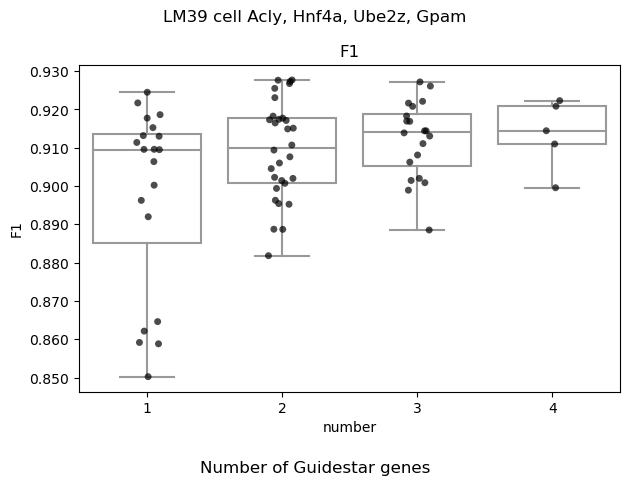

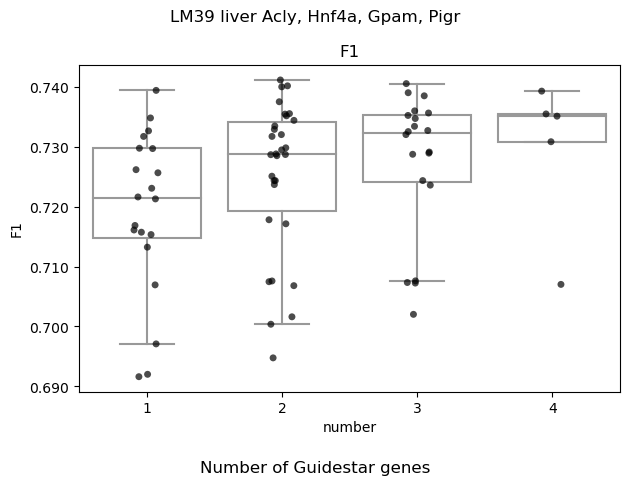

In [ ]:
### Cell
numgenes_cell = pd.read_csv('../DataForFigures/NumGenes_cell.csv')

fig,ax = plt.subplots()
sns.boxplot(data=numgenes_cell,x='number',y='F1',color='white',showfliers=False,ax=ax)
sns.stripplot(data=numgenes_cell,x='number',y='F1',color='black',alpha=0.7,ax=ax)
ax.set_title('F1')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
fig.suptitle('LM39 cell Acly, Hnf4a, Ube2z, Gpam')
fig.supxlabel('Number of Guidestar genes')
fig.tight_layout()
fig.savefig(os.path.join(output_dir,'numgenes_cell.svg'))

### Liver
numgenes_liver = pd.read_csv('../DataForFigures/NumGenes_liver.csv')

fig,ax = plt.subplots()
sns.boxplot(data=numgenes_liver,x='number',y='F1',color='white',showfliers=False,ax=ax)
sns.stripplot(data=numgenes_liver,x='number',y='F1',color='black',alpha=0.7,ax=ax)
ax.set_title('F1')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
fig.suptitle('LM39 liver Acly, Hnf4a, Gpam, Pigr')
fig.supxlabel('Number of Guidestar genes')
fig.tight_layout()
fig.savefig(os.path.join(output_dir,'numgenes_liver.svg'))

### SuppFig3c, d imbalance sampling

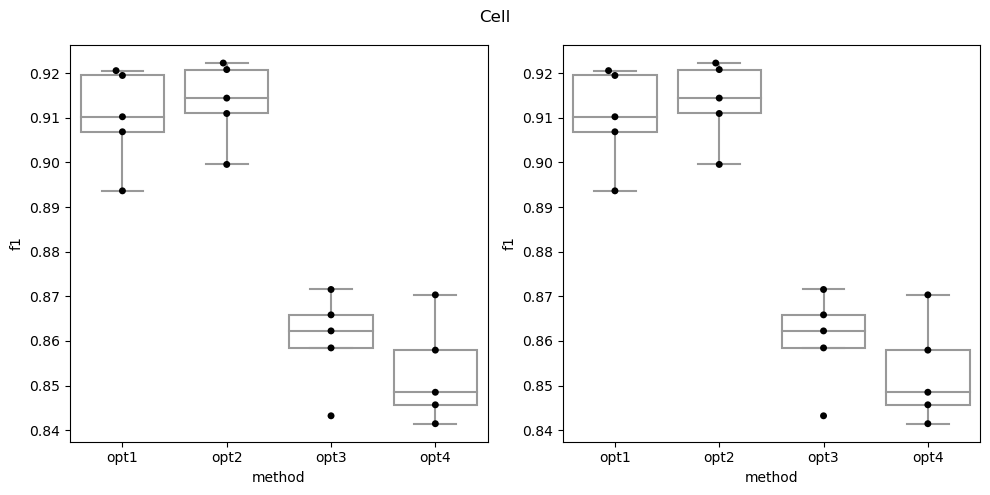

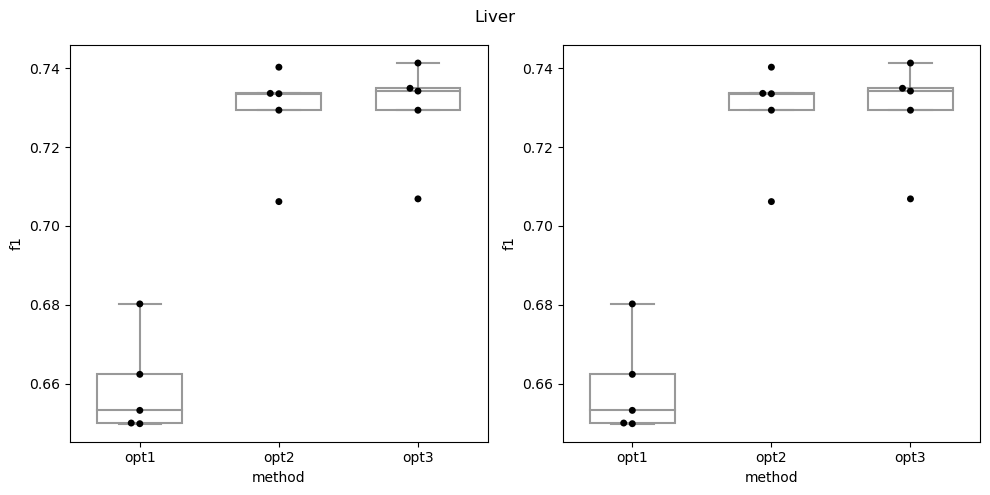

In [ ]:
### Cell
sampling_cell = pd.read_csv('../DataForFigures/Imbalance_sampling_cell.csv')

fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=sampling_cell,x='method',y='f1',color='white',showfliers=False,ax=ax[0])
sns.swarmplot(data=sampling_cell,x='method',y='f1',color='black',ax=ax[0])
sns.boxplot(data=sampling_cell,x='method',y='f1',color='white',showfliers=False,ax=ax[1])
sns.swarmplot(data=sampling_cell,x='method',y='f1',color='black',ax=ax[1])
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle('Cell')
fig.tight_layout()
fig.savefig(os.path.join(output_dir,'SamplingMethod_cell_v3.svg'))

fig, ax = plt.subplots(1,2,figsize=(10,5))
sampling_liver = pd.read_csv('../DataForFigures/Imbalance_sampling_liver.csv')
sns.boxplot(data=sampling_liver,x='method',y='f1',color='white',showfliers=False,ax=ax[0], width=0.61)
sns.swarmplot(data=sampling_liver,x='method',y='f1',color='black',ax=ax[0])

sns.boxplot(data=sampling_liver,x='method',y='f1',color='white',showfliers=False,ax=ax[1], width=0.61)
sns.swarmplot(data=sampling_liver,x='method',y='f1',color='black',ax=ax[1])
# ax[1].set_ylim(0.38,0.65)
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle('Liver')
fig.tight_layout()
fig.savefig(os.path.join(output_dir,'SamplingMethod_liver_v3.svg'))

### SuppFig3e Feature selection plot

In [ ]:
def modify_string(s):
    numbers = s.strip('()').replace(',', '').split('\n')
    modified_numbers = ['F' + str(int(num) + 1) for num in numbers]
    modified_string = '\n'.join(modified_numbers)
    
    return modified_string

SFS_cell = pd.read_csv('../DataForFigures/Feature_selection_cell.csv')
SFS_cell_adj = pd.DataFrame({'feature':SFS_cell.iloc[0,1:].values,'mean_F1':[0] * len(SFS_cell.columns[1:]), 'std_F1':[0] * len(SFS_cell.columns[1:])})

for i,col in enumerate(SFS_cell.columns[1:]):
    SFS_cell_adj['mean_F1'].iloc[i] = np.mean([float(i) for i in SFS_cell[col].iloc[1].strip('][').split(' ')])
    SFS_cell_adj['std_F1'].iloc[i] = np.std([float(i) for i in SFS_cell[col].iloc[1].strip('][').split(' ')])

for row in range(len(SFS_cell_adj)):
    SFS_cell_adj['feature'].iloc[row] = SFS_cell_adj['feature'].iloc[row].replace(', ', '\n')

SFS_cell_adj['feature'] = SFS_cell_adj['feature'].apply(modify_string)

fig, ax = plt.subplots()   
ax.plot(SFS_cell_adj['feature'],SFS_cell_adj['mean_F1'], color='black')
ax.fill_between(SFS_cell_adj['feature'], SFS_cell_adj['mean_F1']-SFS_cell_adj['std_F1'], SFS_cell_adj['mean_F1']+SFS_cell_adj['std_F1'],alpha=0.5)
ax.set_ylim(0.88,0.93)
fig.supylabel('F1')
fig.savefig(os.path.join(output_dir,'FeatureSelection_cell.svg'))

### SuppFig3f Hyperparameter optimization

In [ ]:
hypparam_list = ['n_estimators', 'criterion', 'min_impurity_decrease', 'min_weight_fraction_leaf', 'max_samples']

hypparam_cell = pd.read_csv('../DataForFigures/Hyperparam_optimization_cell.csv')
hypparam_cell['mean_F1'] = hypparam_cell[['f1_' + str(i) for i in range(5)]].mean(axis=1)

fig, axes = plt.subplots(1,5,figsize=(11,2))
axes = axes.ravel()
for i, hp in enumerate(hypparam_list):
    sns.boxplot(data=hypparam_cell,x=hp,y='mean_F1',ax=axes[i],color='white',showfliers=False)
    # sns.stripplot(data=hypparam_cell,x=hp,y='mean_F1',ax=axes[i])
    # axes[i].set_ylim(0.88,0.93)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
fig.tight_layout()
fig.savefig(os.path.join(output_dir,'Hyperparam_cell.svg'))